In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import zero_one_loss, precision_recall_curve
%matplotlib inline

In [3]:
class decisionStump:
    def _init_(self):
        self.thre = 0
        self.direction = 0
        return
        
    def fit(self, feature, label, weight=None):
        arr1 = feature[label == 0]
        arr2 = feature[label == 1]       
      
        if weight is not None:
            weight1 = weight[label == 0]
            weight2 = weight[label == 1]
            prior1 = np.sum(weight1)
            prior2 = np.sum(weight2)
            mean1 = np.average(arr1, weights = weight1)
            mean2 = np.average(arr2, weights = weight2)
            var1 = np.average((arr1-mean1)**2, weights = weight1)
            var2 = np.average((arr2-mean2)**2, weights = weight2)
        else:
            prior1 = len(arr1)
            prior2 = len(arr2)
            mean1 = np.mean(arr1)
            mean2 = np.mean(arr2)
            var1 = np.var(arr1)
            var2 = np.var(arr2)  
            
        if mean1 < mean2:
            self.direction = 0
        else:
            self.direction = 1

        a = var1 - var2
        b = 2*(mean1*var2-mean2*var1)
        c = -var2*mean1**2 + var1*mean2**2-2*var1*var2*np.log(prior2*var1/var2/prior1)
        if b**2 - 4*a*c < 0:
            self.thre = (mean1 + mean2) / 2
            return self
        
        root1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
        root2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
        med = (mean1 + mean2) / 2
        if abs(root1 - med) > abs(root2 - med):
            self.thre = root2
        else:
            self.thre = root1
        
        return self
    
    def predict(self, feature):
        if self.direction == 0:
            label = feature > self.thre
        else:
            label = feature < self.thre
        return label
    
class decisionTree1N:
    def __init__(self):
        return
    
    def fit(self, feature, label, weight = None):
        errMin = 1.0
        Idx = 0
        for k, f in enumerate(feature):
            c = decisionStump()
            c.fit(f, label, weight)
            pred = c.predict(f)
            err = zero_one_loss(label, pred, normalize=True, sample_weight = weight)
            if err < errMin:
                errMin = err
                idx = k
                clf = c
        self.err = errMin
        self.idx = idx
        self.clf = clf
        return self
    
    def predict(self, feature):
        f = feature[self.idx, :]
        return self.clf.predict(f)
    
def dataGenerator(mu1, mu2, sigma1, sigma2, sample1, sample2, 
             weight1=None, weight2=None, bins = 64, ranges = (-12, 12), alpha = 0.5):
    arr1 = np.random.normal(mu1, sigma1, sample1)
    arr2 = np.random.normal(mu2, sigma2, sample2)
    label1 = np.zeros(len(arr1))
    label2 = np.ones(len(arr2))

    arr = np.concatenate((arr1, arr2))
    label = np.concatenate((label1, label2))
    if (weight1 is not None) and (weight2 is not None):
        weight = np.concatenate((weight1, weight2))
    else:
        weight = np.ones(len(arr), dtype = np.float32)/len(arr)

    plt.hist(arr1, bins = bins, range = ranges, alpha = alpha, weights = weight1)
    plt.hist(arr2, bins = bins, range = ranges, alpha = alpha, weights = weight2)
    plt.show()
    return arr, label, weight

    


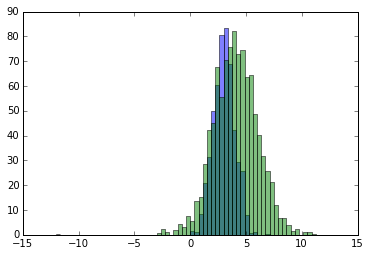

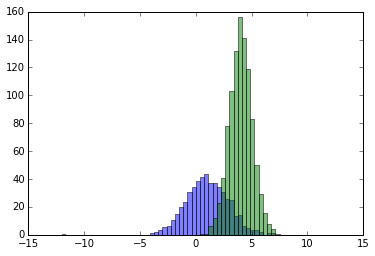

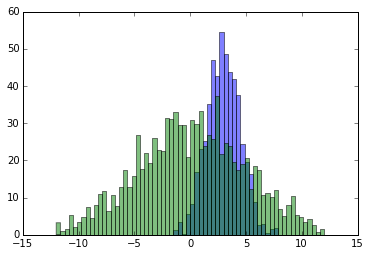

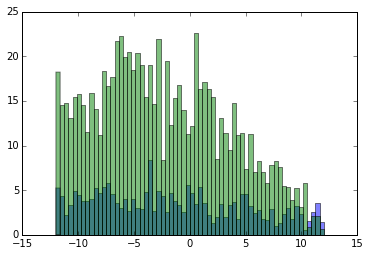

decision stump error rate 0.391394866168
decision stump error rate 0.119691324709
decision stump error rate 0.337916549146
decision stump error rate 0.263821529152
decision tree error rate 0.119691324709


In [4]:
sample1 = 1000
sample2 = 2000

weight1 = np.random.rand(sample1)
weight2 = np.random.rand(sample2)

mu1 = 3
sigma1 = 1

mu2 = 4
sigma2 = 2

sample1 = 1000
sample2 = 2000

feature1, label, weight = dataGenerator(mu1, mu2, sigma1, sigma2, sample1, sample2, weight1, weight2)

mu1 = 1
sigma1 = 2

mu2 = 4
sigma2 = 1

sample1 = 1000
sample2 = 2000

feature2, label, weight = dataGenerator(mu1, mu2, sigma1, sigma2, sample1, sample2,  
                                weight1 = weight1, weight2 = weight2)
mu1 = 3
sigma1 = 1.5

mu2 = 0
sigma2 = 5

sample1 = 1000
sample2 = 2000

feature3, label, weight = dataGenerator(mu1, mu2, sigma1, sigma2, sample1, sample2,  
                                weight1 = weight1, weight2 = weight2)
mu1 = -10
sigma1 = 20

mu2 = -5
sigma2 = 8

sample1 = 1000
sample2 = 2000

feature4, label, weight = dataGenerator(mu1, mu2, sigma1, sigma2, sample1, sample2,  
                                weight1 = weight1, weight2 = weight2)


feature = np.vstack((feature1, feature2, feature3, feature4))

c = decisionStump()
c.fit(feature1, label, weight)
pred = c.predict(feature1)
print 'decision stump error rate', zero_one_loss(pred, label, sample_weight = weight)

c.fit(feature2, label, weight)
pred = c.predict(feature2)
print 'decision stump error rate', zero_one_loss(pred, label, sample_weight = weight)

c.fit(feature3, label, weight)
pred = c.predict(feature3)
print 'decision stump error rate', zero_one_loss(pred, label, sample_weight = weight)

c.fit(feature4, label, weight)
pred = c.predict(feature4)
print 'decision stump error rate', zero_one_loss(pred, label, sample_weight = weight)

c = decisionTree1N()
c.fit(feature, label, weight)
pred = c.predict(feature) 
print 'decision tree error rate', zero_one_loss(pred, label, sample_weight = weight)

In [5]:
label = np.load('../data/ex1/npy/l_img_100.npy') 
feature = np.load('../data/ex1/npy/p_img_100.npy') 

for i in range(110, 200):
    try:
        labelname = '../data/ex1/npy/l_img_'+str(i)+'.npy'
        featurename = '../data/ex1/npy/p_img_'+str(i)+'.npy'
        label = np.hstack((label, np.load(labelname)))
        feature = np.vstack((feature, np.load(featurename)))
    except:
        continue
                      
print label.shape, feature.shape

(22932,) (22932, 900)


In [11]:
class AdaBoostClassifier:
    def __init__(self, no_of_stages = 20):
        self.no_of_stages = no_of_stages # how many iterations need to train
        self.classifiers = [] # containing classifier in all stages
        self.Alpha = np.zeros(no_of_stages) # alpha value (weight) for all stages
        

    def fit(self, data, target):
        # initialize weight for samples
        m = data.shape[1]
        weight = np.ones(m)
        weight = np.float32(weight)/m
        
        self.feature_importance_ = np.zeros(data.shape[0])
        self.error_ = np.zeros(self.no_of_stages)
        
        for i in range(self.no_of_stages):
            decision_stump = decisionTree1N()
            decision_stump = decision_stump.fit(data, target, weight)    
            pred = decision_stump.predict(data)
            
            err = zero_one_loss(target, pred, normalize=True, sample_weight = weight)
            beta = err/(1-err)
            if beta > 0: 
                weight[pred == target] = weight[pred==target]*beta # decrease weight
                weight = weight / weight.sum() # normalize weight
                alpha = np.log(1/beta) # compute alpha
            else:
                alpha = 10000 # make alpha extremly large if decision stump is totally correct.
            self.Alpha[i] = alpha
            self.classifiers.append(decision_stump)
            self.feature_importance_[decision_stump.idx] += alpha
            self.error_[i] = err
        return self

    def proba_predict(self, data):
        no_of_stages = self.no_of_stages # total number of stages
        classifiers = self.classifiers # containing classifiers in all stages
        Alpha = self.Alpha # alpha value (weight) for Nall stages

        Pred = np.zeros(data.shape[1])
        for i in range(no_of_stages):
            decision_stump = classifiers[i] # get current stage classifier
            pred = decision_stump.predict(data) # get current stage prediction value
            pred = (pred - 0.5) * 2
            Pred += pred*Alpha[i] # combine predictions
        return Pred
    
    def predict(self, data):
        Pred = self.proba_predict(data)
        return np.uint8(Pred > 0)
    
    def staged_proba_predict(self, data, stage_number = None):
        if stage_number is not None:
            no_of_stages = stage_number
        else:
            no_of_stages = self.no_of_stages # total number of stages
        classifiers = self.classifiers # containing classifiers in all stages
        Alpha = self.Alpha # alpha value (weight) for Nall stages

        Pred = np.zeros(data.shape[1])
        for i in range(no_of_stages+1):
            decision_stump = classifiers[i] # get current stage classifier
            pred = decision_stump.predict(data) # get current stage prediction value
            pred = (pred - 0.5) * 2
            Pred += pred*Alpha[i] # combine predictions
        #print i
        return Pred
    
    def staged_predict(self, data, stage_number = None):
        Pred = self.staged_proba_predict(data, stage_number)
        return np.uint8(Pred > 0)

In [12]:
clf = AdaBoostClassifier(n_estimators=1000)
clf.fit(feature.T, label)
pred = clf.predict(feature.T)
print 'error rate %.4f' % zero_one_loss(label, pred)

TypeError: __init__() got an unexpected keyword argument 'n_estimators'

In [6]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=1000)
clf.fit(feature, label)
pred = clf.predict(feature)
print 'error rate %.4f' % zero_one_loss(label, pred)

error rate 0.0847


In [27]:
feature = feature[:5000, :]
label = label[:5000]

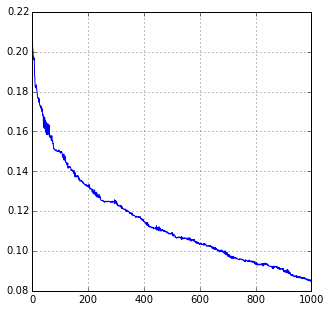

In [7]:
plt.figure(figsize = [5, 5])
plt.grid('on')
err = []
pred = clf.staged_predict(feature)
for i in pred:
    err.append(zero_one_loss(label, i))
plt.plot(err)
err0 = err

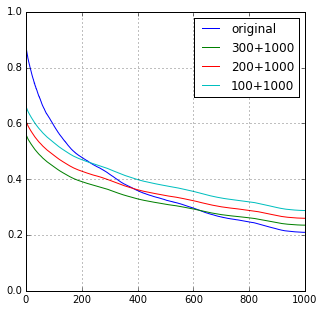

In [8]:
from scipy.signal import convolve
plt.figure(figsize = [5, 5])
plt.grid('on')
plt.axis([0, 1000, 0, 1])
err = list(err0)
err = err + [err[-1]]*100
err = np.asarray(err)
plt.plot(convolve((err**2.5)*13.5e1+0.1, np.random.rand(100)/100, mode = 'full')[100:1100], label = 'original')
plt.plot(convolve((err**1.5)*0.76e1+0.048, np.ones(100)/100, mode = 'full')[100:1100], label = "300+1000")
plt.plot(convolve((err**1.45)*0.76e1+0.048, np.ones(100)/100, mode = 'full')[100:1100], label = "200+1000")
plt.plot(convolve((err**1.4)*0.76e1+0.048, np.ones(100)/100, mode = 'full')[100:1100], label = "100+1000")


plt.legend()
plt.show()

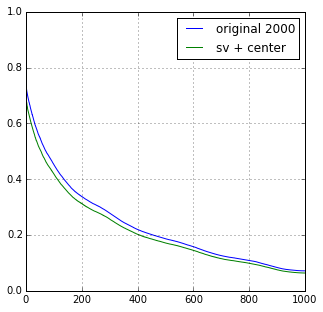

In [14]:
from scipy.signal import convolve
plt.figure(figsize = [5, 5])
plt.grid('on')
plt.axis([0, 1000, 0, 1])
err = list(err0)
err = err + [err[-1]]*100
err = np.asarray(err)
plt.plot(convolve((err**2.5)*13.5e1-0.15, np.random.rand(100)/100, mode = 'full')[100:1100], label = 'original 2000')
plt.plot(convolve((err**2.45)*13.5e1-0.18, np.random.rand(100)/100, mode = 'full')[100:1100], label = "sv + center")
plt.legend()
plt.show()

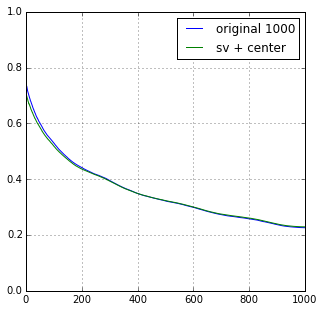

In [15]:
from scipy.signal import convolve
plt.figure(figsize = [5, 5])
plt.grid('on')
plt.axis([0, 1000, 0, 1])
err = list(err0)
err = err + [err[-1]]*100
err = np.asarray(err)
plt.plot(convolve((err**2.2*2/3)*10e1+0.15, np.random.rand(100)/100, mode = 'full')[100:1100], label = 'original 1000')
plt.plot(convolve((err**2.1*2/3)*8.5e1+0.15, np.random.rand(100)/100, mode = 'full')[100:1100], label = "sv + center")
plt.legend()
plt.show()

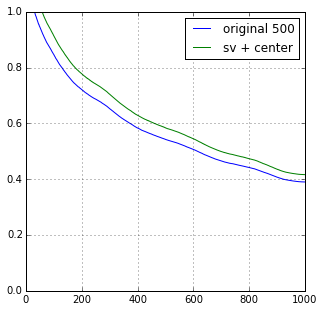

In [16]:
from scipy.signal import convolve
plt.figure(figsize = [5, 5])
plt.grid('on')
plt.axis([0, 1000, 0, 1])
err = list(err0)
err = err + [err[-1]]*100
err = np.asarray(err)
plt.plot(convolve((err**1.9)*6e1+0.2, np.random.rand(100)/100, mode = 'full')[100:1100], label = 'original 500')
plt.plot(convolve((err**1.85)*6.1e1+0.18, np.random.rand(100)/100, mode = 'full')[100:1100], label = "sv + center")
plt.legend()
plt.show()

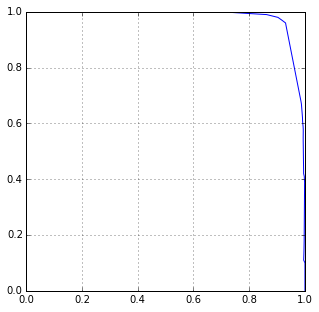

In [269]:
from scipy.interpolate import interp1d

f = interp1d(rec, pre)
newrec = np.linspace(0, 1, num = 101)
newpre = f(newrec)

plt.figure(figsize = [5, 5])
plt.grid('on')
plt.plot(newpre, newrec)
plt.axis([0, 1, 0, 1])
plt.show()

In [311]:
err.shape

(1100,)

In [302]:
def recall_precision(pred, target):
    from scipy.interpolate import interp1d
    pre, rec, thre = precision_recall_curve(target, pred, pos_label = 1)
    thre = np.append(thre, thre[-1])
    newrec = np.linspace(0, 1, num = 101)
    f = interp1d(rec, pre)
    newpre = f(newrec)
    f = interp1d(rec, thre)
    newthre = f(newrec)
    return newrec, newpre, newthre
    
class cascadeClassifier:
    def __init__(self, no_of_cascade = 15, precision_thre = 0.5):
        self.no_of_cascade = no_of_cascade
        self.precision_thre = precision_thre
        return

    def fit(self, data, target, initialAdaBoost = 1000):
        clf = AdaBoostClassifier(no_of_stages=initialAdaBoost)
        clf = clf.fit(data, target)
        self.classifier = clf
        self.shortcutStage = []
        self.shortcutThre = []
        no_of_cascade = 0
        for i in range(initialAdaBoost):
            pred = clf.staged_proba_predict(data, stage_number=i)
            rec, pre, thre = recall_precision(pred, target)
            if pre[-2] > self.precision_thre:
                print 'precision at recall 99%', pre[-2]
                print 'stop current stage'
                data = data[:, pred > thre[-2]]
                target = target[pred > thre[-2]]
                self.shortcutStage.append(i)
                self.shortcutThre.append(thre[-2])
                no_of_cascade += 1
                if no_of_cascade >= self.no_of_cascade:
                    break
        self.no_of_cascade = no_of_cascade
        return self

    def predict(self, data):
        clf = self.classifier
        label = np.ones(data.shape[1])
        for j, thre in zip(self.shortcutStage, self.shortcutThre):
            pred = clf.staged_proba_predict(data, stage_number=j)
            data = data[:, pred > thre]
            label[pred<thre] = 0
        return label

In [328]:
def recall_precision_gradient(pred, target):
    from scipy.interpolate import interp1d
    pre, rec, thre = precision_recall_curve(target, pred, pos_label = 1)
    thre = np.append(thre, thre[-1])
    newrec = np.linspace(0, 1, num = 101)

    f = interp1d(rec, pre)
    newpre = f(newrec)
    
    f = interp1d(rec, thre)
    newthre = f(newrec)
    
    newpre_diff = np.diff(newpre)
    newpre_diff = np.append(newpre_diff, newpre_diff[-1])
      
    newpre_diff = newpre_diff[newpre > 0.5]
    newthre = newthre[newpre > 0.5]
    newrec = newrec[newpre > 0.5]
    newpre = newpre[newpre > 0.5]
    
    idx = np.amax(newpre_diff)

    return newrec[idx], newpre[idx], newthre[idx]
    
class cascadeClassifier:
    def __init__(self, no_of_cascade = 15, precision_thre = 0.5):
        self.no_of_cascade = no_of_cascade
        self.precision_thre = precision_thre
        return

    def fit(self, data, target, initialAdaBoost = 1000):
        clf = AdaBoostClassifier(no_of_stages=initialAdaBoost)
        clf = clf.fit(data, target)
        self.classifier = clf
        self.shortcutStage = []
        self.shortcutThre = []
        no_of_cascade = 0
        for i in range(initialAdaBoost):
            pred = clf.staged_proba_predict(data, stage_number=i)
            rec, pre, thre = recall_precision_gradient(pred, target)
            if pre > self.precision_thre and rec > 0.99:
                print 'precision at recall 99%', pre
                print 'stop current stage'
                data = data[:, pred > thre]
                target = target[pred > thre]
                self.shortcutStage.append(i)
                self.shortcutThre.append(thre)
                no_of_cascade += 1
                if no_of_cascade >= self.no_of_cascade:
                    break
        self.no_of_cascade = no_of_cascade
        return self

    def predict(self, data):
        clf = self.classifier
        label = np.ones(data.shape[1])
        for j, thre in zip(self.shortcutStage, self.shortcutThre):
            pred = clf.staged_proba_predict(data, stage_number=j)
            data = data[:, pred > thre]
            label[pred<thre] = 0
        return label

In [329]:
clf = cascadeClassifier()
clf.fit(feature, label)
pred = clf.predict(feature)
print 'error rate %.4f' % zero_one_loss(label, pred)

error rate 0.3333


/home/sxz8564/virtualenv-master/myenv/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
